# Detection and Classification fruits: Apple and Orange

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Classification_Apple_vs_Orange

/content/drive/MyDrive/Classification_Apple_vs_Orange


In [ ]:
!ls -a

data


In [ ]:
# !rm -rf Classification_Apple_vs_Orange

In [ ]:
# !mkdir -p Classification_Apple_vs_Orange/data

In [ ]:
# !cd Classification_Apple_vs_Orange

## Steps
1. Download dataset from kaggle using `opendataset`
2. Pre-processing data from dataset
3. Split dataset into train data and test data
4. Build `CustomDataset` class
5. Build `transforms`
6. Convert data to `Dataloader`
7. Select/Build neural network
8. Test model and `CustomDataset`
9. Build train and test function
10. Select loss function and optimizer
11. Train model
12. Evaluate model
13. Train with diffrent neural network.
14. Deploy
  - https://medium.com/@dima_24154/optimizing-deep-learning-inference-resnet-50-model-optimization-with-onnx-openvino-and-nvidia-7cfca94304d6

## Step 1: Download dataset
**Datasets**:
- https://www.kaggle.com/datasets/sriramr/apples-bananas-oranges

More data if model isn't good:
- https://www.kaggle.com/datasets/balraj98/apple2orange-dataset?select=metadata.csv




In [ ]:
# !pip install -q opendatasets

In [ ]:
def is_dir_empty(dir_path):
  return not any(dir_path.iterdir())

In [ ]:
# import opendatasets as od
# from pathlib import Path
# root_path = Path('/content/drive/MyDrive/Classification_Apple_vs_Orange')
# image_path = root_path / 'data/fruits'
# if not image_path.is_dir():
#   print(f'Create directory {image_path}...')
#   image_path.mkdir(parents=True, exist_ok=True)
# if is_dir_empty(image_path):
#   print(f'Downloading data into {image_path}...')
#   od.download('https://www.kaggle.com/datasets/sriramr/apples-bananas-oranges', data_dir=image_path)
# else:
#   print("Data is downloaded")

Create directory /content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits...
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: genkikuro
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sriramr/apples-bananas-oranges


100%|██████████| 512M/512M [00:12<00:00, 44.2MB/s]

In [ ]:
from pathlib import Path
root_path = Path('/content/drive/MyDrive/Classification_Apple_vs_Orange')
image_path = root_path / 'data/fruits'

## Step 2: Prep-processing data

In [ ]:
# !mkdir /content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/apples
# !mkdir /content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/oranges

In [ ]:
# !mv /content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/apples-bananas-oranges/original_data_set/freshapples /content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/apples/
# !mv /content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/apples-bananas-oranges/original_data_set/rottenapples /content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/apples

In [ ]:
# !mv /content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/apples-bananas-oranges/original_data_set/freshoranges /content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/oranges
# !mv /content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/apples-bananas-oranges/original_data_set/rottenoranges /content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/oranges

In [ ]:
# !rm -rf /content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/apples-bananas-oranges

In [ ]:
import os
def walk_through_dir(dir_path):
  image_paths = []
  for dir_path, dir_names, file_names in os.walk(dir_path):
    if file_names:
      print(f'There are {len(dir_names)} directories and {len(file_names)} images in {dir_path}')
      for file_name in file_names:
        path = os.path.join(dir_path, file_name)
        image_paths.append(path)
  return image_paths

In [ ]:
image_path_list = walk_through_dir(image_path)

There are 0 directories and 175 images in /content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/train/oranges/rottenoranges
There are 0 directories and 162 images in /content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/train/oranges/freshoranges
There are 0 directories and 191 images in /content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/train/apples/freshapples
There are 0 directories and 262 images in /content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/train/apples/rottenapples
There are 0 directories and 41 images in /content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/test/apples/freshapples
There are 0 directories and 66 images in /content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/test/apples/rottenapples
There are 0 directories and 44 images in /content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/test/oranges/freshoranges
There are 0 directories and 47 images in /content/drive/MyDrive/Cl

In [ ]:
image_path_list[:10]

['/content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/train/oranges/rottenoranges/Screen Shot 2018-06-12 at 11.30.06 PM.png',
 '/content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/train/oranges/rottenoranges/Screen Shot 2018-06-12 at 11.31.48 PM.png',
 '/content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/train/oranges/rottenoranges/Screen Shot 2018-06-12 at 11.43.36 PM.png',
 '/content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/train/oranges/rottenoranges/Screen Shot 2018-06-12 at 11.33.06 PM.png',
 '/content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/train/oranges/rottenoranges/Screen Shot 2018-06-12 at 11.46.04 PM.png',
 '/content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/train/oranges/rottenoranges/Screen Shot 2018-06-12 at 11.25.55 PM.png',
 '/content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/train/oranges/rottenoranges/Screen Shot 2018-06-12 at 11.44.06 PM.png',
 '/content/drive/MyD

In [ ]:
len(image_path_list)

988

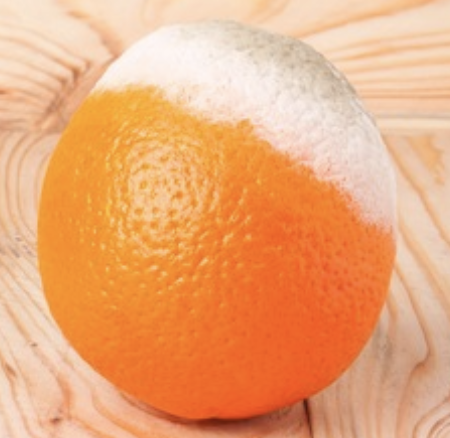

In [ ]:
from PIL import Image

image = Image.open(image_path_list[1])
image

In [ ]:
def find_classes(target_dir):
    classes = sorted(entry.name for entry in os.scandir(target_dir) if entry.is_dir())
    if not classes:
      raise FileNotFoundError(f"Couldn't find any class name in {target_dir}, please check your input dir!")
    cls_to_idx = {cls_name: idx for idx, cls_name in enumerate(classes)}
    return classes, cls_to_idx

find_classes(image_path)

(['test', 'train'], {'test': 0, 'train': 1})

In [ ]:
Path(image_path_list[1]).parent.parent.stem

'oranges'

In [ ]:
train_dir = '/content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/train'
test_dir = '/content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/test'

In [ ]:
find_classes(train_dir)

(['apples', 'oranges'], {'apples': 0, 'oranges': 1})

## Step 3: Split train data and test data

In [ ]:
# train_rate = 0.8
# from sklearn.model_selection import train_test_split
# train_paths, test_paths = train_test_split(image_path_list, train_size=train_rate, random_state=42)

# import pandas as pd
# pd.Series({
#     "Training samples:": len(train_paths),
#     "Test samples:": len(test_paths)
# }).to_frame().style.hide(axis='columns')

Training samples:,790
Test samples:,198


In [ ]:
# from pathlib import Path

# # Define the full path and the base directory
# full_path = Path(train_paths[200])

# # Extract the relative path
# relative_path = full_path.relative_to(image_path)

# print(f"Relative path: /{relative_path}")
# print(f'Parent: {relative_path.parent}')
# print(f'Parent parent: {relative_path.parent.parent}')

Relative path: /oranges/rottenoranges/Screen Shot 2018-06-12 at 11.23.54 PM.png
Parent: oranges/rottenoranges
Parent parent: oranges


In [ ]:
# !mkdir /content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/train
# !mkdir /content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/test

### Create train and test dir

In [ ]:
# import shutil
# train_dir = '/content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/train'
# test_dir = '/content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/test'

# for path in (train_paths):
#   relative_path = Path(path).relative_to(image_path)
#   train_path_parent = Path(train_dir) / relative_path
#   os.makedirs(train_path_parent.parent, exist_ok=True)
#   shutil.copy(path, train_path_parent)
# for path in test_paths:
#   relative_path = Path(path).relative_to(image_path)
#   test_path_parent = Path(test_dir) / relative_path
#   os.makedirs(test_path_parent.parent, exist_ok=True)
#   shutil.copy(path, test_path_parent)


In [ ]:
# !rm -rf /content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/apples
# !rm -rf /content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/oranges

In [ ]:
train_dir, test_dir

('/content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/train',
 '/content/drive/MyDrive/Classification_Apple_vs_Orange/data/fruits/test')

## Step 4: Build `transform`

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import os
from pathlib import Path

In [ ]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

## Step 5: Build `FruitsDataset` class

In [ ]:
class FruitsDataset(Dataset):
  def __init__(self, target_dir, transformer:transforms=None):
    self.image_paths = self._walk_through_dir(target_dir)
    # self.image_paths = [Path(p) for p in target_dir]
    self.transform = transformer
    self.classes, self.cls_to_idx = self._find_classes(target_dir)

  def _walk_through_dir(self, target_dir):
    dir_paths = [dir_path for dir_path, _, file_names in os.walk(target_dir) if file_names]
    image_paths = []
    for path in dir_paths:
      image_paths += Path(path).glob("*.png")
    if not image_path:
      raise FileNotFoundError(f"Couldn't find any images in {target_dir}, please check your input dir!")
    return image_paths

  def _find_classes(self, target_dir):
    classes = sorted(entry.name for entry in os.scandir(target_dir) if entry.is_dir())
    if not classes:
      raise FileNotFoundError(f"Couldn't find any class name in {target_dir}, please check your input dir!")
    cls_to_idx = {cls_name: idx for idx, cls_name in enumerate(classes)}
    return classes, cls_to_idx

  def _load_image(self, index):
    image = Image.open(self.image_paths[index])
    return image.convert('RGB')

  def __len__(self):
    return len(self.image_paths)

  def __getitem__(self, index):
    image = self._load_image(index)
    class_name = self.image_paths[index].parent.parent.stem
    cls_to_idx = self.cls_to_idx[class_name]
    if self.transform:
      image = self.transform(image)
    return image, cls_to_idx

## Test `FruitsDataset`

In [ ]:
train_data = FruitsDataset(train_dir, transformer=transform)
test_data = FruitsDataset(test_dir, transformer=transform)

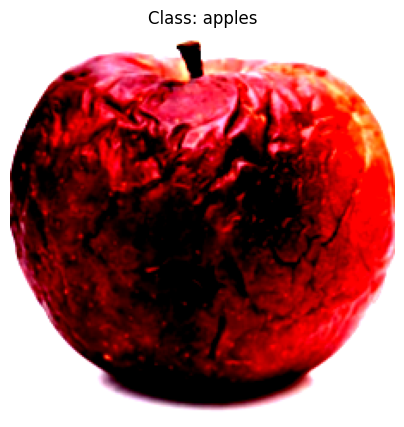

In [ ]:
import matplotlib.pyplot as plt
import random

random_idx = random.randint(0, len(train_data))
image, cls_to_idx = train_data[random_idx]

plt.figure(figsize=(5, 5))
plt.imshow(image.permute(1,2,0))
plt.title(f'Class: {train_data.classes[cls_to_idx]}')
plt.axis('off')
plt.show()

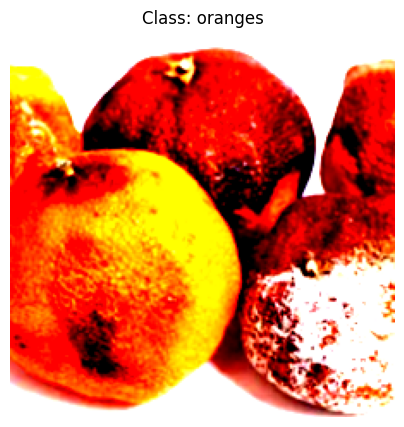

In [ ]:
import matplotlib.pyplot as plt
import random

random_idx = random.randint(0, len(test_data))
image, cls_to_idx = train_data[random_idx]

plt.figure(figsize=(5, 5))
plt.imshow(image.permute(1,2,0))
plt.title(f'Class: {train_data.classes[cls_to_idx]}')
plt.axis('off')
plt.show()

In [ ]:
train_data.classes, train_data.classes.__len__()

(['apples', 'oranges'], 2)

## Step 6: Convert data to Dataloader

In [ ]:
from torch.utils.data import DataLoader

batch_size = 32
num_workers = 2

train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, num_workers=num_workers)

Image shape: torch.Size([32, 3, 224, 224]), label: torch.Size([32])


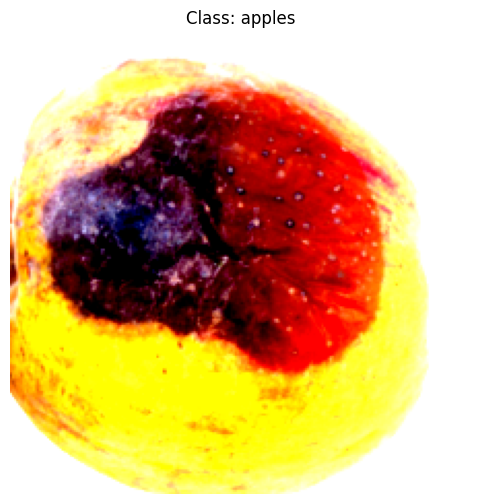

In [ ]:
image, label = next(iter(train_dataloader))
print(f'Image shape: {image.shape}, label: {label.shape}')

plt.figure(figsize=(6,6))
plt.imshow(torch.permute(image[0], (1,2,0)))
plt.title(f'Class: {train_data.classes[label[0]]}')
plt.axis('off')
plt.show()

## Step 7: Select neural network
We will use restnet50, See more in https://pytorch.org/hub/nvidia_deeplearningexamples_resnet50/

In [ ]:
!pip install -q torchinfo

In [ ]:
import torch
import torchvision.models as models
from torchinfo import summary

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
pretrain_url = "https://download.pytorch.org/models/resnet50-11ad3fa6.pth"
# Download the weights
state_dict = torch.hub.load_state_dict_from_url(pretrain_url, progress=True)

# Load the ResNet-50 model
model = models.resnet50()
model.load_state_dict(state_dict)

# Modify the fully connected layer to have 2 output: Apples and Oranges, in the future, we will add more one output is background or all more one model to classifier object from background
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, train_data.classes.__len__())
model.to(device)

summary(model, (32, 3, 256, 256))

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [32, 2]                   --
├─Conv2d: 1-1                            [32, 64, 128, 128]        9,408
├─BatchNorm2d: 1-2                       [32, 64, 128, 128]        128
├─ReLU: 1-3                              [32, 64, 128, 128]        --
├─MaxPool2d: 1-4                         [32, 64, 64, 64]          --
├─Sequential: 1-5                        [32, 256, 64, 64]         --
│    └─Bottleneck: 2-1                   [32, 256, 64, 64]         --
│    │    └─Conv2d: 3-1                  [32, 64, 64, 64]          4,096
│    │    └─BatchNorm2d: 3-2             [32, 64, 64, 64]          128
│    │    └─ReLU: 3-3                    [32, 64, 64, 64]          --
│    │    └─Conv2d: 3-4                  [32, 64, 64, 64]          36,864
│    │    └─BatchNorm2d: 3-5             [32, 64, 64, 64]          128
│    │    └─ReLU: 3-6                    [32, 64, 64, 64]          --
│ 

In [ ]:
next(model.parameters()).device

device(type='cuda', index=0)

## Step 8: Test model and `CustomDataset`

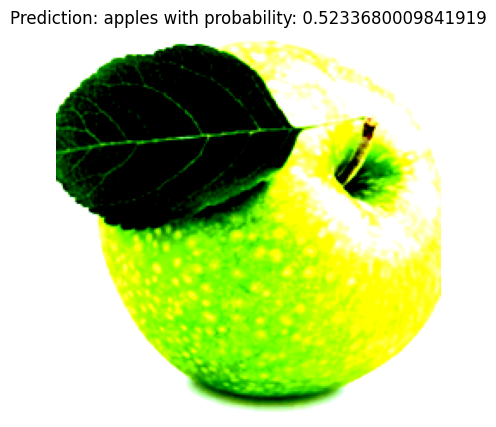

In [ ]:
model.eval()
image, label = test_data[10]
image = image.unsqueeze(0).to(device)
with torch.inference_mode():
  y_preds = model(image)
  prob = torch.softmax(y_preds, dim=1).max().cpu()
  cls_to_idx = torch.argmax(torch.softmax(y_preds, dim=1), dim=1)

  title = f'Prediction: {train_data.classes[cls_to_idx]} with probability: {prob}'

plt.figure(figsize=(5, 5))
plt.imshow(image.squeeze().permute(1,2,0).cpu())
plt.title(title)
plt.axis(False)
plt.show()

## Step 9: Build `train_step`, `test_step` and `train` function

In [ ]:
from tqdm import tqdm
from timeit import default_timer as timer

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               optimizer, loss_fn, device):
  model.train()
  train_loss, train_acc = 0, 0

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_pred = model(X)
    # Calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()
    correct = (torch.argmax(torch.softmax(y_pred, dim=1), dim=1) == y).sum().item()
    train_acc += correct / len(y)
    # Optimizer zero gradient
    optimizer.zero_grad()
    # Backward
    loss.backward()
    # Update weights
    optimizer.step()
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  return train_loss, train_acc * 100

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn, device):
  model.eval()
  test_loss, test_acc = 0, 0
  with torch.inference_mode():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss = loss_fn(y_pred, y)
      test_loss += loss.item()
      correct = (torch.argmax(torch.softmax(y_pred, dim=1), dim=1) == y).sum().item()
      test_acc += correct / len(y)
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
  return test_loss, test_acc * 100

In [ ]:
def train(model, train_dataloader, test_dataloader, epochs, lr, device):
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  loss_fn = torch.nn.CrossEntropyLoss()

  # Save parameters
  results = {
      'epochs': [],
      'train_loss': [],
      'train_acc': [],
      'test_loss': [],
      'test_acc': [],
      'time_train': 0,
      'model_name': model.__class__.__name__,
      'device': device
  }
  start_train = timer()
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       optimizer=optimizer,
                                       loss_fn=loss_fn, device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn, device=device)
    results['epochs'].append(epoch)
    results['train_loss'].append(train_loss)
    results['train_acc'].append(train_acc)
    results['test_loss'].append(test_loss)
    results['test_acc'].append(test_acc)
    if epoch % 10 == 0:
      print(f'\nEpoch: {epoch} | train_loss: {train_loss:.4f} | train_acc: {train_acc:.2f}% | test_loss: {test_loss:.4f} | test_acc: {test_acc:.2f}%')
  end_train = timer()
  results['time_train'] = end_train - start_train
  print(f'\n Time train on {results["model_name"]} on {device} is {end_train - start_train} seconds')
  return results

## Step 10: Train model

In [ ]:
result_resnet_model = train(model=model,
                            train_dataloader=train_dataloader,
                            test_dataloader=test_dataloader,
                            epochs=8, lr=0.001, device=device)

 12%|█▎        | 1/8 [02:56<20:33, 176.14s/it]


Epoch: 0 | train_loss: 0.2363 | train_acc: 90.74% | test_loss: 3.3529 | test_acc: 87.20%


100%|██████████| 8/8 [04:36<00:00, 34.55s/it]


 Time train on ResNet on cuda is 276.4439823839999 seconds


In [ ]:
result_resnet_model['train_loss'][-1], result_resnet_model['test_loss'][-1]

(0.057404172327369454, 0.04133861478684204)

## Step 11: Visualization train and test progress

In [ ]:
def plot_training_and_testing_results(results):
  train_loss = results['train_loss']
  train_acc = results['train_acc']
  test_loss = results['test_loss']
  test_acc = results['test_acc']
  epochs = results['epochs']

  plt.figure(figsize=(10, 7))
  plt.suptitle(f'Train and Test {results["model_name"]} on {results["device"]} in {epochs[-1] + 1} epochs')

  plt.subplot(1,2,1)
  plt.plot(epochs, train_loss, label='train_loss')
  plt.plot(epochs, test_loss, label='test_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  plt.grid(True)

  plt.subplot(1,2,2)
  plt.plot(epochs, train_acc, label='train_acc')
  plt.plot(epochs, test_acc, label='test_acc')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()
  plt.grid(True)

  plt.tight_layout()
  plt.show()


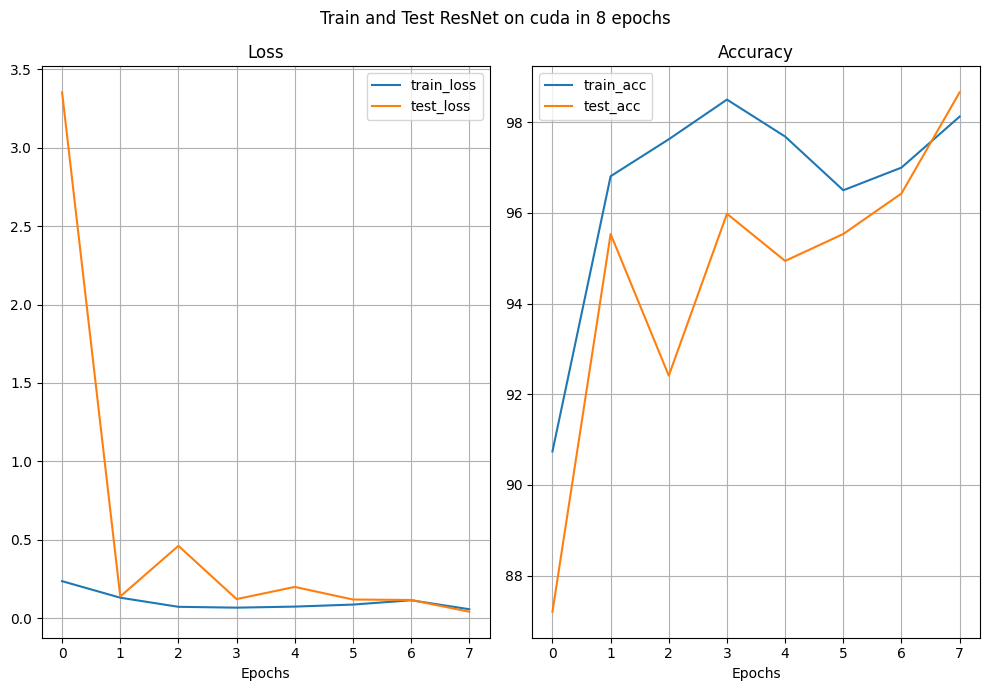

In [ ]:
plot_training_and_testing_results(result_resnet_model)

## Step 12: Save model

In [ ]:
save_path = root_path / 'models'
save_path.mkdir(parents=True, exist_ok=True)
model_path = save_path / 'resnet50_model.pth'
torch.save(model.state_dict(), model_path)

## Step 13: Evaluate model
- How much accuracy of model?
- How much big size of model?
- How long time to predict?

### Measuring time to predict and accuracy of model

In [ ]:
def make_predict(model, image, transform, device='cpu'):
  start_predict = timer()
  model.eval()
  transformed_image = transform(image).unsqueeze(0).to(device)
  model.to(device)
  with torch.inference_mode():
    y_pred = model(transformed_image)
    prob = torch.softmax(y_pred, dim=1)
    cls_to_idx = torch.argmax(prob, dim=1)
    prob = prob.max().cpu()
    class_name = train_data.classes[cls_to_idx]
  end_predict = timer()
  time_predict = end_predict - start_predict
  plt.figure(figsize=(6,6))
  plt.imshow(image)
  plt.title(f'Prediction: {class_name} | Probability: {prob}\n Time predict: {time_predict}')
  plt.axis('off')
  plt.show()
  return prob, time_predict

In [ ]:
import requests
from PIL import Image
def download_image(image_address, file_name):
    print(f'Downloading {file_name}...')
    request = requests.get(image_address)
    with open(file_name, 'wb') as f:
      f.write(request.content)
    print(f'Downloaded {file_name}')
    return Image.open(file_name).convert('RGB')

In [ ]:
image = download_image(image_address='https://www.buildrestfoods.com/wp-content/uploads/2020/08/green-apply.jpg', file_name='input_1.png')

Downloaded input_1.png


In [ ]:
image_2 = download_image('https://images.pexels.com/photos/102104/pexels-photo-102104.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500', 'input_2.png')

Downloaded input_2.png


In [ ]:
image_3 = download_image('https://www.thespruceeats.com/thmb/oIV1zdRcUSV5z8oJSRBw5lIJcGA=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/Mandarin-Orange-581b2ccb3df78cc2e81b59a0.jpg', 'input_3.png')

Downloaded input_3.png


In [ ]:
image_4 = download_image('https://img.ehowcdn.com/-/ppds/808aeba2-e75c-4bf1-bcfc-5c42e491b214.jpg', 'input_4.png')

Downloaded input_4.png


In [ ]:
image_5 = download_image('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQLilHc6ZCtWJxnQSYrZIrIcPzMK0094k5l0A&s', 'input_5.png')

Downloaded input_5.png


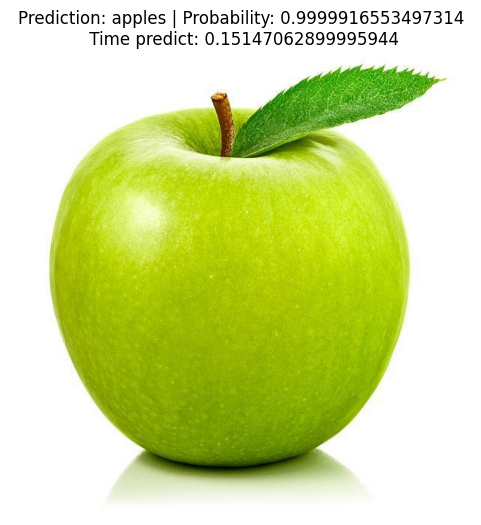

(tensor(1.0000), 0.15147062899995944)

In [ ]:
make_predict(model=model, image=image, transform=transform)

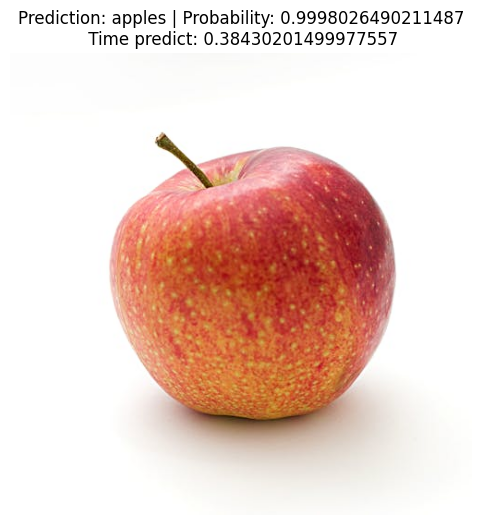

In [ ]:
make_predict(model=model, image=image_2, transform=transform)

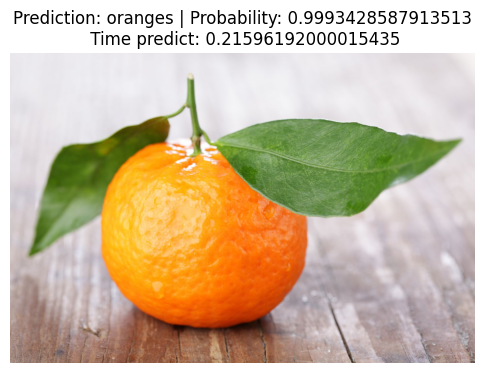

In [ ]:
make_predict(model=model, image=image_3, transform=transform)

In [ ]:
def make_predict_path(model, image_path, transform, device='cpu'):
  start_predict = timer()
  model.eval()
  image = Image.open(image_path)
  transformed_image = transform(image).unsqueeze(0).to(device)
  model.to(device)
  with torch.inference_mode():
    y_pred = model(transformed_image)
    prob = torch.softmax(y_pred, dim=1)
    cls_to_idx = torch.argmax(prob, dim=1)
    prob = prob.max().cpu()
    class_name = train_data.classes[cls_to_idx]
  end_predict = timer()
  time_predict = end_predict - start_predict
  plt.figure(figsize=(6,6))
  plt.imshow(image)
  plt.title(f'Prediction: {class_name} | Probability: {prob}\n Time predict: {time_predict}')
  plt.axis('off')
  plt.show()
  return prob, time_predict

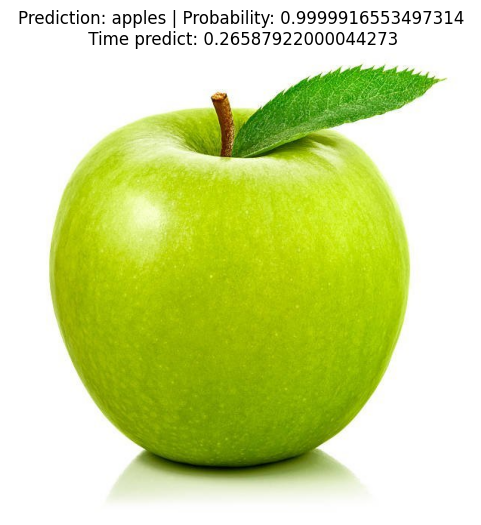

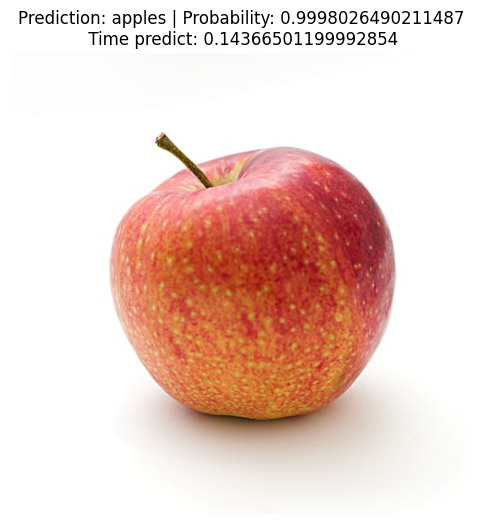

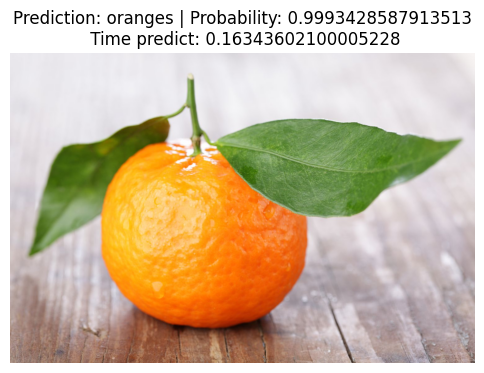

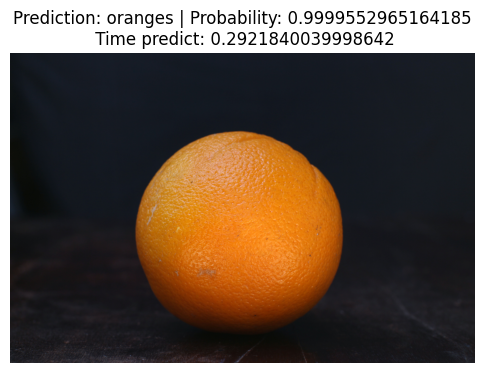

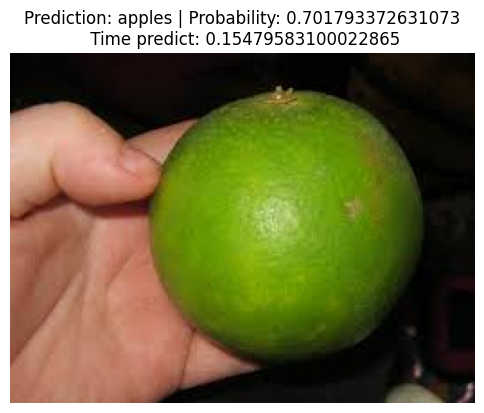

In [ ]:
predict_images = ['input_1.png', 'input_2.png', 'input_3.png', 'input_4.png', 'input_5.png']
probs, times = 0, 0
for i in predict_images:
  prob, time = make_predict_path(model=model, image_path=i, transform=transform)
  probs += prob
  times += time
probs /= len(predict_images)
times /= len(predict_images)

### Determine big size of model

In [ ]:
model_path

PosixPath('/content/drive/MyDrive/Classification_Apple_vs_Orange/models/resnet50_model.pth')

In [ ]:
from pathlib import Path

restnet50_size = model_path.stat().st_size// (1024*1024)
print(f"ResNet50 feature extractor model size: {restnet50_size} MB")

ResNet50 feature extractor model size: 89 MB


In [ ]:
import pandas as pd

resnet50_info = pd.DataFrame(
    {
    'Name': model.__class__.__name__,
    'Accuracy testing (%)': [result_resnet_model['test_acc'][-1]],
    'Accuracy predict (%)': probs.item() * 100,
    'Time predict (s)': [times],
    'Size (MB)': [restnet50_size]
    }
)
resnet50_info

,Name,Accuracy testing (%),Accuracy predict (%),Time predict (s),Size (MB)
0,ResNet,98.660714,94.017714,0.203992,89


In [ ]:
resnet50_info.to_csv('models/resnet50_info.csv', index=False)